<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Melika Rajabi

**Student ID**: 99101608

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
X, Y = None, None

### START CODE HERE ###

df = pd.read_csv('q1.csv')
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = df[['Y1']]

### END CODE HERE ###

print(X.shape)
print(Y.shape)


(768, 8)
(768, 1)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: Normalizing is done because of several reasons. Some of them are:
- Some methods such as Gradient Descent, are sensitive to the scale of the input features. Normalizing the input features can improve the convergence of the algorithm and reduce the training time.
- It can improve the interpretability of the model. The coefficients of the model represent the importance of each feature in predicting the target variable. When the input features are on different scales, it becomes difficult to interpret the coefficients as the importance of the feature is confounded with the scale of the feature.
- Using regularization, when the input features are on different scales, the penalty is not uniform across the features. 
- Normalizing the input features can reduce the influence of outliers and improve the robustness of the model. Outliers are observations that are significantly different from the other observations in the dataset and can have a large impact on the coefficients of the model when the input features are on different scales. 

In [3]:
### START CODE HERE ###

X_norm = (X - X.mean()) / X.std()
Y_norm = (Y - Y.mean()) / Y.std()

X = X_norm
Y = Y_norm

### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [4]:
### START CODE HERE ###

bias = np.ones((X.shape[0],1))
X.insert(0, 'bias', bias)

### END CODE HERE ###

print(X.shape)


(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [5]:
def loss(X, Y, w):
    ''' 
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    loss = None

    ### START CODE HERE ###
    loss = np.dot((np.dot(X,w) - Y).T, (np.dot(X,w) - Y)) / m
    ### END CODE HERE ###
    
    # Returning the integer value of the 1 by 1 list
    return loss.item()


Note that the matrix form of the loss function is:
    $$\mathcal{L}(\boldsymbol{w}) = \frac{1}{m} (\boldsymbol{X}\boldsymbol{w} - \boldsymbol{Y})^T(\boldsymbol{X}\boldsymbol{w} - \boldsymbol{Y})$$

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer: The direct answer to the optimization problem above is 
$$\boldsymbol{w} = \underset{\boldsymbol{w}}{\arg \min}\mathcal{L}(\boldsymbol{w}) = (\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{Y})$$

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [6]:
def direct_method(X, Y):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    '''
    w = None
    
    ### START CODE HERE ###
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    ### END CODE HERE ###
    
    return w


Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [7]:
w = direct_method(X, Y) # Calculating w using direct method
print(f"loss for this problem using direct method is {loss(X, Y, w)}")

loss for this problem using direct method is 0.11103039614693923


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**: The gradient of the loss function equals: 
$$\nabla\mathcal{L}(\boldsymbol{w}) = \frac{2}{m} \boldsymbol{X}^T(\boldsymbol{X}\boldsymbol{w} - \boldsymbol{Y})$$

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [8]:
def gradient(X, Y, w):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    grad = None
    
    ### START CODE HERE ###
    
    grad = (2/m) * (np.dot(X.T, np.dot(X, w) - Y))
  
    ### END CODE HERE ###
    
    return grad


Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [9]:
def gradient_descent(X, Y, alpha, num_iter):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    alpha: learning rate
    num_iter: number of iterations of the algorithm
    '''
    m, n = X.shape
    w, loss_history = None, [] 
    
    ### START CODE HERE ###
    
    # Initializing w using randn
    w = np.random.randn(n, 1)
    
    # Iterating 
    for i in range(0, num_iter):
        # Updating w
        w = w - alpha * gradient(X, Y, w)
        # Constructing the loss history
        loss_history = np.append(loss_history, loss(X, Y, w))
  
    ### END CODE HERE ###
    
    return w, loss_history


Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**: The learning rate is a hyperparameter in the gradient descent optimization algorithm that controls the step size taken in the direction of the negative gradient. If the learning rate is too small, the optimization process may be slow, while if it is too large, the optimization may oscillate or even diverge. Therefore, selecting an appropriate learning rate is crucial for the success of the optimization process.
A good learning rate can converge quickly and efficiently towards the minimum of the loss function. A good starting point for the learning rate is usually $0.1$, but the optimal value depends on the problem and the data.
A method to find the best learning rate is to use a learning rate schedule, which gradually reduces the learning rate over time. This can help the algorithm to converge more smoothly and avoid oscillations or divergences.

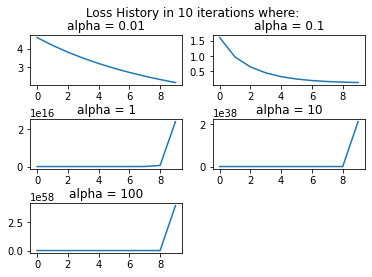

In [10]:
### START CODE HERE ###

alpha = [0.01, 0.1, 1, 10, 100]
num_iter = 10

fig, axs = plt.subplots(5)
fig.subplots_adjust(hspace=0.7)

for a in alpha:
    w, loss_history = gradient_descent(X, Y, a, num_iter)
    plt.subplot(3, 2, alpha.index(a)+1)
    plt.plot(loss_history)
    plt.title('alpha = ' + str(a))
    
plt.suptitle('Loss History in ' + str(num_iter) + ' iterations where:')
plt.show()

### END CODE HERE ###

As it is shown in the plots, when $\alpha$ is $0.01$ the algorithm converges but slowly. This happens because the step size is too small to make significant progress towards the minimum of the loss function, so the algorithm takes many small steps before it reaches the minimum. When we increase it to $0.1$, the speed of convergence increases. On the other hand, when $\alpha$ is $1$ or more, the algorithm overshoots the minimum of the loss function and even diverges and the loss function increases instead of decreasing. Based on these explanations, the best learning rate among these numbers may be $0.1$.

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**: The two methods that can be used to solve linear regression problems are the direct method (also known as the normal equation) and the iterative method (such as Gradient Descent).
Some factors to consider when choosing between the direct method and Gradient Descent are ...

1. Computational Complexity: The direct method requires computing the inverse of a matrix, which can be computationally expensive and memory-intensive for large datasets. In contrast, Gradient Descent requires only matrix multiplications and vector additions, which are generally more computationally efficient. Therefore, Gradient Descent may be preferred for large datasets.

2. Convergence Rate: The direct method provides the exact solution to the linear regression problem in one step, whereas Gradient Descent requires multiple iterations to converge to a solution. However, the convergence rate of Gradient Descent can be improved by using an appropriate learning rate and other optimization techniques. Therefore, Gradient Descent may be preferred for problems where the direct method is not practical or efficient.

3. Regularization: The direct method can be extended to include regularization, such as $L1$ or $L2$ regularization, which can help prevent overfitting in the model. Gradient Descent can also be extended to include regularization, but this requires additional computations and hyperparameters. Therefore, the direct method may be preferred for problems where regularization is important.

4. Numerical Stability: The direct method may not be numerically stable for ill-conditioned matrices, which can lead to numerical errors or incorrect solutions. Gradient Descent is more numerically stable and can handle ill-conditioned matrices more effectively. Therefore, Gradient Descent may be preferred for problems where numerical stability is a concern.

In summary, the choice between the direct method and Gradient Descent depends on the specific problem and the available computational resources. The direct method may be preferred for small datasets, problems with regularization, and problems where numerical stability is a concern. Gradient Descent may be preferred for large datasets, problems where the direct method is not practical or efficient, and problems where iterative optimization techniques are necessary.

## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

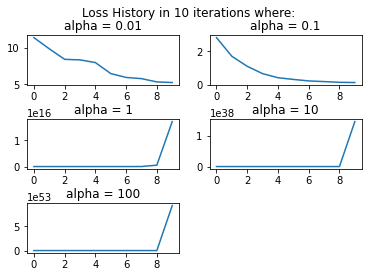

In [11]:
def stochastic_gradient_descent(X, Y, k, alpha, num_iter):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    k: number of data points used in each iteration
    alpha: learning rate
    num_iter: number of iterations of the algorithm
    '''
    m, n = X.shape
    w, loss_history = None, [] 
    
    ### START CODE HERE ###

    w = np.random.randn(n, 1)
    
    for i in range(0, num_iter):
        
        # Choosing k number of samples from the data set
        X_sample = X.sample(k)
        Y_sample = Y.loc[X_sample.index]
        
        # Computing the gradient descent but using samples (stochastic gradient descent)
        w = w - alpha * gradient(X_sample, Y_sample, w)
        loss_history = np.append(loss_history, loss(X_sample, Y_sample, w))
        
    ### END CODE HERE ###
    
    return w, loss_history


# Applying the function on our data set
alpha = [0.01, 0.1, 1, 10, 100]
num_iter = 10
k = 200;

# Plotting the loss history in different learning rates
fig, axs = plt.subplots(5)
fig.subplots_adjust(hspace=0.7)

for a in alpha:
    w, loss_history = stochastic_gradient_descent(X, Y, k, a, num_iter)
    plt.subplot(3, 2, alpha.index(a)+1)
    plt.plot(loss_history)
    plt.title('alpha = ' + str(a))
    
plt.suptitle('Loss History in ' + str(num_iter) + ' iterations where:')
plt.show()
 

As expected, the outputs are nearly similar to the gradient descent. But in each iteration just a subset of data is used which leads to more noisy updates. As a result, the loss history function of SGD shows a more erratic curve with each iteration, as the updates to the model parameters are more variable. However, this noise can actually be beneficial, as it can help the model escape from local minima and converge to a better global minimum. Additionally, the use of mini-batches allows SGD to perform updates more frequently than GD, which can lead to faster convergence to a solution.